## Step 1 2D Data Generalization and Visualization

In [133]:
# Import numpy for numerical processing
import numpy as np

# Set random seed for reproducibility
np.random.seed(63)

# Define parameters for first category distribution
# Mean and standard deviation
mean_category1 = [1, 1]
std_dev_category1 = 1

# Define parameters for second category distribution
mean_category2 = [5, 5]
std_dev_category2 = 1

# Generate first category dataset
# 100 samples, 2 dimensions
# Values sampled from normal distribution
data_category1 = np.random.normal(mean_category1, std_dev_category1, size=(100, 2))

# Generate second category dataset
# 100 samples, 2 dimensions
# Values sampled from normal distribution
data_category2 = np.random.normal(mean_category2, std_dev_category2, size=(100, 2))

# Vertically stack the categories to create full dataset
dataset = np.vstack((data_category1, data_category2))

# Print first 5 rows to preview dataset
print("Generated 2D dataset:")
print(dataset[:5])

Generated 2D dataset:
[[-1.13897865  2.11206124]
 [ 1.03580155  0.36984226]
 [ 1.00003541 -0.20895742]
 [ 1.29162807 -0.65065515]
 [-0.50712909  1.26528183]]


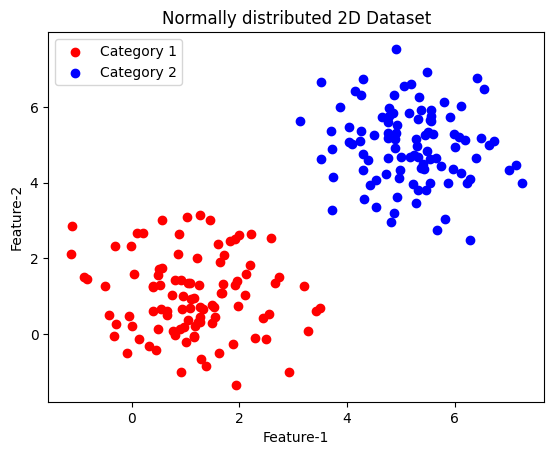

In [134]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Create scatter plot for first category
# Use first column as x values
# Use second column as y values
# Set label and blue color
plt.scatter(data_category1[:, 0], data_category1[:, 1],label='Category 1', c='red')

# Create scatter plot for second category
# Use first column as x values
# Use second column as y values
# Set label and orange color
plt.scatter(data_category2[:, 0], data_category2[:, 1],label='Category 2', c='blue')

# Set x axis label
plt.xlabel('Feature-1')

# Set y axis label
plt.ylabel('Feature-2')

# Set plot title
plt.title('Normally distributed 2D Dataset')

# Add legend to identify categories
plt.legend()

# Display the generated scatter plot
plt.show()

##Step 2 Helper Function and Initialization

In [135]:
import numpy as np

# Function to calculate Euclidean distance between two points
def euclid_dist(point1, point2):

    # Convert inputs to numpy arrays
    point1 = np.array(point1)
    point2 = np.array(point2)

    # Calculate difference between the points
    # Take norm to find Euclidean distance
    distance = np.linalg.norm(point1 - point2)

    # Return the computed distance
    return distance

# Example usage

# Select two arbitrary data points
point_a = dataset[3]
point_b = dataset[123]

# Compute distance between them
distance_ab = euclid_dist(point_a, point_b)

# Print out the two points and their distance
print(f"Euclidean distance between {point_a} and {point_b}: {distance_ab}")

Euclidean distance between [ 1.29162807 -0.65065515] and [6.00113412 4.94760958]: 7.315737494159331


In [136]:
import matplotlib.pyplot as plt

# Function to initialize k centroids by randomly sampling data points
def initialize_centroids(data, k):

    # Randomly select k unique data points as centroids
    indices = np.random.choice(len(data), k, replace=False)

    # Retrieve selected data points
    centroids = data[indices]

    # Return the initialized centroids
    return centroids

# Example usage with generated 2D dataset

k_value = 2

# Initialize 2 centroids
initial_centroids = initialize_centroids(dataset, k_value)

# Print out the selected initial centroids
print(initial_centroids)

[[ 1.29162807 -0.65065515]
 [ 2.1086454   1.03105274]]


<ipython-input-137-2a04b692baa5>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset[:100, 0], dataset[:100, 1], c='k', cmap='viridis', label='Cat 1')
<ipython-input-137-2a04b692baa5>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset[100:, 0], dataset[100:, 1], c='b', cmap='viridis', label='Cat 2')


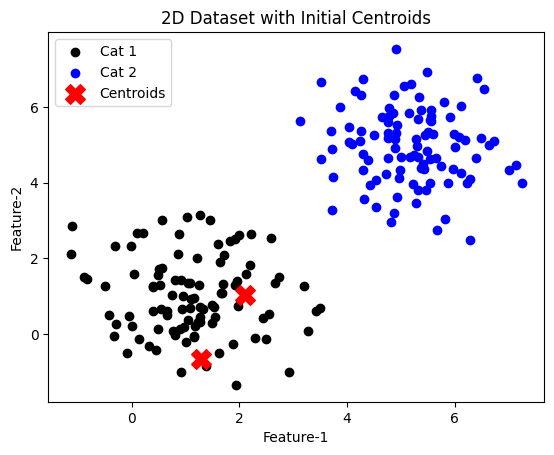

In [137]:
# Scatter plot for the dataset
plt.scatter(dataset[:100, 0], dataset[:100, 1], c='k', cmap='viridis', label='Cat 1')
plt.scatter(dataset[100:, 0], dataset[100:, 1], c='b', cmap='viridis', label='Cat 2')

# Scatter plot for the initial centroids with markers
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='X', label='Centroids', s=200, c='red')

# Set labels and title
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('2D Dataset with Initial Centroids')

# Add legend
plt.legend()

# Display the plot
plt.show()

##Step 3 K-means Implementation


In [138]:
# Function to assign each data point to a cluster
def assign_cluster(data, centroids):

    # Get number of data points
    num_data_points = len(data)

    # Get number of centroids
    num_centroids = len(centroids)

    # Initialize array to store cluster assignment for each point
    labels = np.zeros(num_data_points, dtype=int)

    for i in range(num_data_points):

        # Calculate distance to all centroids
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]

        # Assign point to cluster with minimum distance
        # (i.e. nearest centroid)
        labels[i] = np.argmin(distances)

    # Return cluster labels array
    return labels

In [139]:
# Function to update cluster centroids by calculating
# the mean of all points assigned to each cluster
def update_centroids(data, labels, k):

    # Initialize array to store new centroids
    new_centroids = np.zeros((k, data.shape[1]))

    for cluster in range(k):

        # Get data points assigned to the current cluster
        cluster_indices = np.where(labels == cluster)

        # Calculate new centroid as cluster mean
        if len(cluster_indices[0]) > 0:
            cluster_mean = np.mean(data[cluster_indices], axis=0)
            new_centroids[cluster] = cluster_mean

    # Return updated centroids
    return new_centroids


# Example usage with dataset, initial labels and centroids

# Updated centroids
#new_centroids = update_centroids(dataset, cluster_labels, k_value)

# Print updated centroids
#print("Updated Centroids:")
#print(new_centroids)

In [140]:
import numpy as np

# K-Means implementation
def k_means(data, k, max_iterations=100):

    # Step 1: Initialize k centroids randomly
    centroids = initialize_centroids(data, k)

    for iteration in range(max_iterations):

        # Step 2: Assign each data point to nearest cluster
        labels = assign_cluster(data, centroids)

        # Step 3: Update cluster centroids as mean of points
        new_centroids = update_centroids(data, labels, k)

        # Step 4: Check if centroids converged
        if np.array_equal(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations.")
            break

        # Update centroids for next iteration
        centroids = new_centroids

    # Return final centroids and cluster labels
    return centroids, labels


# Example usage on generated 2D dataset with k=2

final_centroids, final_labels = k_means(dataset, k_value)

# Print final centroids and cluster labels
print("Final Centroids:")
print(final_centroids)

print("\nFinal Cluster Labels:")
print(final_labels)

Converged after 4 iterations.
Final Centroids:
[[5.1800804  4.96972931]
 [1.13833775 0.99797355]]

Final Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Converged after 2 iterations.


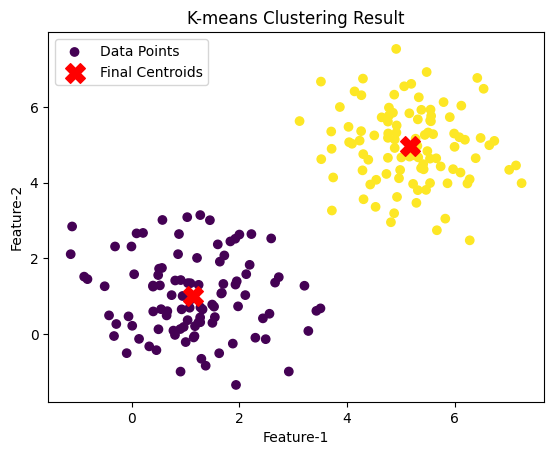

In [141]:
# Step 3: K-means Implementation (d)
import matplotlib.pyplot as plt

# Apply K-means algorithm to the generated dataset
final_centroids, final_labels = k_means(dataset, k_value)

# Scatter plot for the dataset with cluster colors
plt.scatter(dataset[:, 0], dataset[:, 1], c=final_labels, cmap='viridis', label='Data Points')

# Scatter plot for the final centroids with markers
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, c='red', label='Final Centroids')

# Set labels and title
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('K-means Clustering Result')

# Add legend
plt.legend()

# Display the plot
plt.show()


##Step 4 [Optional]Train K-means model on MNIST dataset

In [142]:
# Import fetch_openml function from scikit-learn
from sklearn.datasets import fetch_openml

# Fetch MNIST handwritten digits dataset
# Images are stored as 784 pixels (28x28 pixels)
# Return features and labels separately
x,y = fetch_openml('mnist_784', return_X_y=True)

# Print shape of feature array x
# Should have 70,000 samples with 784 features each
print(x.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [143]:
y.shape

(70000,)

In [144]:
x = np.array(x)
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [145]:
# Rescale pixel values to range 0-1
x = x/255.0

# Print maximum pixel value after rescaling
# Values should now fall between 0-1 rather than 0-255
print(max(x[0]))

1.0


In [146]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split data into training and test sets
# 30% of data used for testing
# Remainder used for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [147]:
x_train.shape

(49000, 784)

##Step 5 Mini-Batch K-means

In [148]:
from sklearn.cluster import MiniBatchKMeans

In [149]:
# Import MiniBatchKMeans cluster model
from sklearn.cluster import MiniBatchKMeans

# Create model instance
# Set number of clusters to find as 10
hw = MiniBatchKMeans(n_clusters = 10)

# Fit model to training data
# Will find 10 clusters in the training set
hw.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [150]:
hw.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [151]:
hw.inertia_

1936226.6559880828

In [152]:
# List of cluster numbers to evaluate
n_clusters = [10, 16, 64, 256]

# Initialize list to track inertias
inny = []

for n in n_clusters:

    # Create model with current num clusters
    hw = MiniBatchKMeans(n_clusters = n)

    # Fit model to training data
    hw.fit(x_train)

    # Get model inertia (sum of squared distances to clusters)
    inertia = hw.inertia_

    # Append the inertia to results list
    inny.append(inertia)

# Print out all inertias
print(inny)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1951271.9368358501, 1808722.2029836539, 1473782.5163900708, 1227105.0046668714]


In [153]:
min(inny)

1227105.0046668714

In [154]:
n = n_clusters[inny.index(min(inny))]

In [155]:
n

256

In [156]:
hw = MiniBatchKMeans(n_clusters = n)
hw.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=256)

In [157]:
hw.labels_

array([232,  84,  17, ..., 139, 109, 125], dtype=int32)

In [158]:
y_train[hw.labels_ == 180]

10553    6
64211    6
4943     6
50387    6
43941    0
        ..
42153    0
47387    8
40304    6
50503    6
32381    6
Name: class, Length: 142, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [159]:
from statistics import mode

In [160]:
hw_labels_list = []
for i in range(n):
    hw_labels_list.append(mode(y_train[hw.labels_ == i]))

In [161]:
hw_labels_list

['1',
 '5',
 '2',
 '7',
 '1',
 '6',
 '3',
 '9',
 '0',
 '7',
 '0',
 '4',
 '6',
 '8',
 '4',
 '9',
 '4',
 '1',
 '5',
 '7',
 '8',
 '1',
 '3',
 '0',
 '0',
 '6',
 '6',
 '5',
 '9',
 '9',
 '9',
 '5',
 '1',
 '2',
 '0',
 '7',
 '7',
 '7',
 '2',
 '6',
 '6',
 '2',
 '0',
 '5',
 '7',
 '1',
 '6',
 '7',
 '0',
 '3',
 '8',
 '6',
 '3',
 '7',
 '5',
 '3',
 '2',
 '3',
 '2',
 '5',
 '4',
 '5',
 '7',
 '4',
 '2',
 '0',
 '9',
 '3',
 '0',
 '8',
 '2',
 '2',
 '5',
 '3',
 '0',
 '1',
 '9',
 '4',
 '4',
 '6',
 '0',
 '2',
 '1',
 '9',
 '1',
 '9',
 '3',
 '6',
 '6',
 '2',
 '6',
 '8',
 '1',
 '8',
 '7',
 '0',
 '8',
 '6',
 '8',
 '3',
 '2',
 '1',
 '8',
 '4',
 '3',
 '1',
 '2',
 '1',
 '8',
 '6',
 '7',
 '7',
 '9',
 '3',
 '7',
 '2',
 '1',
 '3',
 '9',
 '6',
 '4',
 '0',
 '7',
 '4',
 '1',
 '5',
 '5',
 '0',
 '7',
 '9',
 '0',
 '9',
 '3',
 '6',
 '7',
 '4',
 '3',
 '7',
 '2',
 '9',
 '4',
 '3',
 '2',
 '2',
 '7',
 '8',
 '4',
 '4',
 '3',
 '9',
 '4',
 '5',
 '3',
 '5',
 '6',
 '8',
 '8',
 '0',
 '0',
 '6',
 '5',
 '8',
 '8',
 '9',
 '9',
 '5',
 '0'

In [162]:
hwprediction = hw.predict(x_test)
hwprediction

array([148,  27,   1, ..., 178, 197,  54], dtype=int32)

In [163]:
hw_pred_labels = []
for prediction in hwprediction:
    hw_pred_labels.append(hw_labels_list[prediction])

hw_pred_labels

['3',
 '5',
 '5',
 '1',
 '3',
 '7',
 '3',
 '6',
 '9',
 '1',
 '3',
 '4',
 '0',
 '2',
 '2',
 '9',
 '0',
 '6',
 '6',
 '9',
 '8',
 '3',
 '7',
 '4',
 '2',
 '8',
 '8',
 '9',
 '9',
 '0',
 '3',
 '1',
 '6',
 '4',
 '4',
 '1',
 '8',
 '3',
 '2',
 '9',
 '7',
 '7',
 '1',
 '1',
 '3',
 '2',
 '2',
 '1',
 '2',
 '1',
 '1',
 '4',
 '3',
 '5',
 '2',
 '1',
 '5',
 '4',
 '4',
 '7',
 '8',
 '6',
 '6',
 '6',
 '1',
 '2',
 '3',
 '5',
 '7',
 '7',
 '1',
 '1',
 '3',
 '9',
 '7',
 '5',
 '1',
 '7',
 '6',
 '0',
 '7',
 '7',
 '8',
 '7',
 '5',
 '2',
 '4',
 '8',
 '8',
 '9',
 '4',
 '9',
 '6',
 '8',
 '7',
 '8',
 '6',
 '1',
 '3',
 '4',
 '4',
 '6',
 '1',
 '9',
 '1',
 '1',
 '3',
 '7',
 '5',
 '5',
 '1',
 '0',
 '9',
 '3',
 '6',
 '9',
 '7',
 '1',
 '9',
 '6',
 '5',
 '9',
 '0',
 '7',
 '2',
 '3',
 '0',
 '6',
 '7',
 '0',
 '5',
 '9',
 '7',
 '7',
 '1',
 '1',
 '9',
 '6',
 '8',
 '9',
 '8',
 '1',
 '4',
 '2',
 '4',
 '5',
 '2',
 '5',
 '5',
 '8',
 '7',
 '1',
 '2',
 '4',
 '1',
 '7',
 '7',
 '3',
 '6',
 '2',
 '9',
 '7',
 '5',
 '1',
 '2',
 '2',
 '4'

In [164]:
y_test

149      3
34112    5
7444     5
60745    1
54660    3
        ..
63516    8
41948    9
20944    2
25405    6
50759    5
Name: class, Length: 21000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [165]:
# Function to calculate accuracy score
def manual_accuracy_score(true_labels, predicted_labels):

    # Get number of correct predictions
    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))

    # Calculate accuracy percentage
    accuracy = correct_predictions / len(true_labels)

    # Return accuracy score
    return accuracy

In [166]:
manual_accuracy_score(y_test, hw_pred_labels)

0.8967619047619048

##Step 4 [Optional]Train K-means model on MNIST dataset (10 pts)(For additional marks)

In [167]:
# calling kmeans to the mnist dataset
from datetime import datetime
time = datetime.now()
final_centroids, final_labels = k_means(x_train, 10)
print("total time taken ", datetime.now() - time)

Converged after 31 iterations.
total time taken  0:02:30.458781
